<a href="https://colab.research.google.com/github/Ashu-sarkar/CodSoft/blob/main/sales_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# sales-prediction

Use the "Run" button to execute the code.

In [2]:
# Import Directories
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import warnings
warnings.filterwarnings('ignore')


In [3]:
# Import Data for processig
adv_data = pd.read_csv('/content/advertising.csv')

# Extracting Information about the data

In [4]:
# Top five data of the table
adv_data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [5]:
# Bottom five data of the table
adv_data.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


In [6]:
adv_data.shape

(200, 4)

In [7]:
adv_data.describe

<bound method NDFrame.describe of         TV  Radio  Newspaper  Sales
0    230.1   37.8       69.2   22.1
1     44.5   39.3       45.1   10.4
2     17.2   45.9       69.3   12.0
3    151.5   41.3       58.5   16.5
4    180.8   10.8       58.4   17.9
..     ...    ...        ...    ...
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1   14.0
197  177.0    9.3        6.4   14.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   18.4

[200 rows x 4 columns]>

# Applying process of Exploratory Data Analysis

In [8]:
a = adv_data['TV']
b = adv_data['Sales']

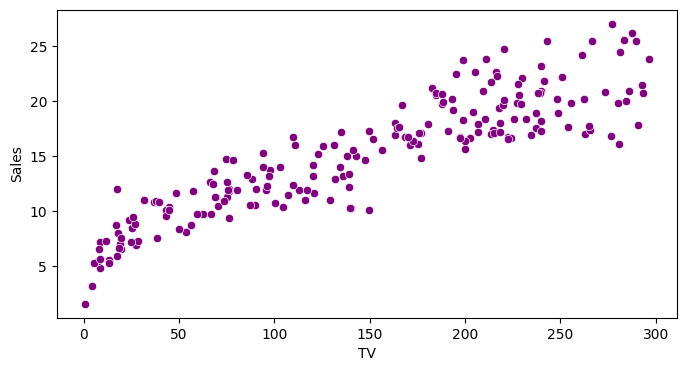

In [9]:
plt.figure(figsize=(8, 4))
sns.scatterplot(x=a, y=b, color='purple')
plt.show()

In [10]:
a = adv_data['Newspaper']
b = adv_data['Sales']

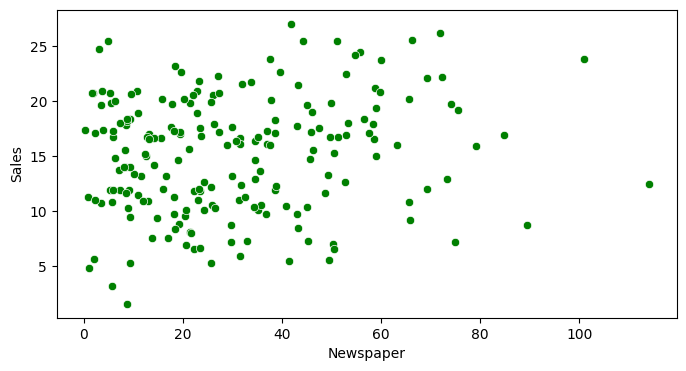

In [11]:
plt.figure(figsize=(8, 4))
sns.scatterplot(x=a, y=b, color='green')
plt.show()

In [12]:
a = adv_data['Radio']
b = adv_data['Sales']

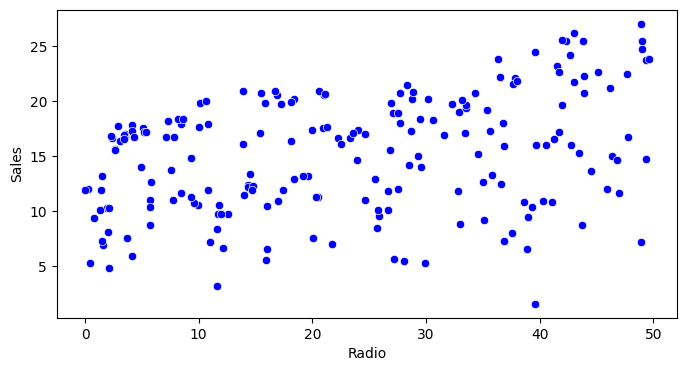

In [13]:
plt.figure(figsize=(8, 4))
sns.scatterplot(x=a, y=b, color='blue')
plt.show()

<Axes: >

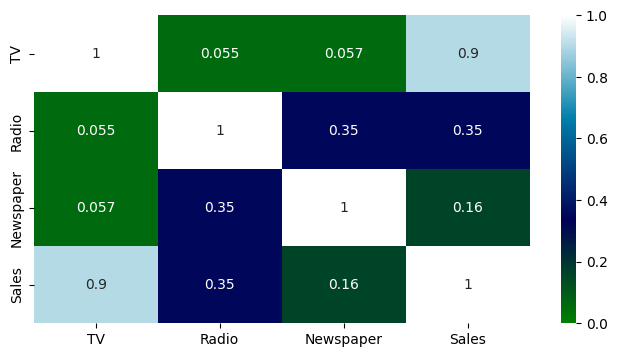

In [14]:
plt.figure(figsize=(8,4))
sns.heatmap(adv_data.corr(), annot=True,vmin=0,vmax=1,cmap='ocean')

# Statistical Analysis of the Data

In [15]:
adv_data.std()

TV           85.854236
Radio        14.846809
Newspaper    21.778621
Sales         5.283892
dtype: float64

In [16]:
adv_data.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


In [17]:
adv_data.mean()

TV           147.0425
Radio         23.2640
Newspaper     30.5540
Sales         15.1305
dtype: float64

In [18]:
adv_data.median()

TV           149.75
Radio         22.90
Newspaper     25.75
Sales         16.00
dtype: float64

#Applying the model of Linear Regression

In [19]:
 X = adv_data[['TV', 'Newspaper', 'Radio']]
 Y = adv_data[['Sales']]

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,train_size = 0.8, random_state=20)

In [21]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, Y_train)

LinearRegression()

In [22]:
lr.intercept_

array([4.6481815])

In [23]:
lr.coef_

array([[0.05348737, 0.00424759, 0.10543652]])

# Splitting Dataset and Testing

In [24]:
print("The LR Model is: Y = ", lr.intercept_ ,"+", lr.coef_, 'TV', 'Newspaper', 'Radio')

The LR Model is: Y =  [4.6481815] + [[0.05348737 0.00424759 0.10543652]] TV Newspaper Radio


In [25]:
lr.score(X_train, Y_train)

0.9072147754110387

In [26]:
lr.score(X_test,Y_test)

0.8881441362855258

In [27]:
Y_pred = lr.predict(X_test)

In [28]:
Y_pred

array([[21.2848138 ],
       [20.91043783],
       [10.69509996],
       [19.7913078 ],
       [21.16845912],
       [18.90232327],
       [14.72365132],
       [10.23773588],
       [21.93399674],
       [ 7.14013076],
       [10.16898487],
       [14.15866575],
       [17.97295152],
       [ 9.66176635],
       [20.74507312],
       [24.79222836],
       [ 6.11475457],
       [16.34004211],
       [ 8.15579489],
       [ 6.13467773],
       [21.20485236],
       [18.0765751 ],
       [15.779286  ],
       [23.01086671],
       [20.45153144],
       [10.99006528],
       [18.00630747],
       [ 9.38179148],
       [10.58793644],
       [16.84560949],
       [ 9.94596581],
       [19.17387971],
       [ 8.8843535 ],
       [ 9.64302649],
       [24.86989537],
       [17.20103929],
       [ 9.84682929],
       [10.64145876],
       [11.69673326],
       [15.67982848]])

# Accuracy of Linear Regression output for Test and Train Data

<Axes: xlabel='Sales'>

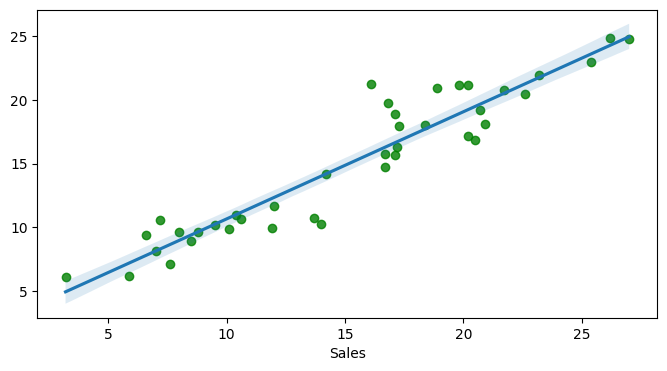

In [42]:
plt.figure(figsize=(8,4))
sns.regplot(x=Y_test, y=Y_pred, scatter_kws={'color': 'green'})